<a href="https://colab.research.google.com/github/Erick-Viana/alura/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# Pré processamentos da analise


In [ ]:
# inserido nome das lojas
loja['loja'] = 'loja 1'
loja2['loja'] = 'loja 2'
loja3['loja'] = 'loja 3'
loja4['loja'] = 'loja 4'

#unindo os dataframe
dados = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
print(dados.head())

                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon    loja  
0    cartao_credito                       8 -22.19 -48.79  loja 1  
1    carta

In [ ]:
# informações gerais
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria do Produto    9435 non-null   object 
 2   Preço                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliação da compra     9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  loja                    9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB
None


In [ ]:
# Convertendo a coluna 'Data da Compra' para tipo datetime
dados['Data da Compra'] = pd.to_datetime(dados['Data da Compra'])
print(dados['Data da Compra'].dtype)

datetime64[ns]


<ipython-input-7-edd70c5fd3ac>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dados['Data da Compra'] = pd.to_datetime(dados['Data da Compra'])


In [ ]:
# Verificação das colunas
print(dados.columns)

# Ver quantas linhas e colunas
print(f"O dataset tem {dados.shape[0]} linhas e {dados.shape[1]} colunas.")

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'loja'],
      dtype='object')
O dataset tem 9435 linhas e 13 colunas.


In [ ]:
#Verificação de valores nulos datafrme
print(dados.isnull().values.any())

# Verificação em porcetagem
percentage_null = (dados.isnull().sum()/len(dados))*100
print(percentage_null)


False
Produto                   0.0
Categoria do Produto      0.0
Preço                     0.0
Frete                     0.0
Data da Compra            0.0
Vendedor                  0.0
Local da compra           0.0
Avaliação da compra       0.0
Tipo de pagamento         0.0
Quantidade de parcelas    0.0
lat                       0.0
lon                       0.0
loja                      0.0
dtype: float64


## Salvar o DataFrame limpo

In [ ]:
dados.to_csv("dados_limpos.csv", index=False)

#1. Análise do faturamento


In [ ]:
# Crindo coluna faturamento
dados['Faturamento_bruto'] = dados['Preço'] + dados['Frete']
# Agregação
faturamento_por_loja = dados.groupby('loja')['Faturamento_bruto'].sum().sort_values(ascending=False)
#Formatação apenas para exibição
print(faturamento_por_loja)


loja
loja 1    1.616347e+06
loja 2    1.567773e+06
loja 3    1.542048e+06
loja 4    1.458253e+06
Name: Faturamento_bruto, dtype: float64


In [ ]:
#Calcular ticket médio e quantidade de vendas por loja
resumo_lojas = dados.groupby('loja').agg(
    faturamento_total = ("Faturamento_bruto",'sum'),
    Qtd_Vendas = ('Faturamento_bruto', 'count'),
    ticket_medio = ('Faturamento_bruto', 'mean')
).sort_values('faturamento_total', ascending=False)

# Formatação
resumo_lojas['ticket_Médio_Formatado'] = resumo_lojas['ticket_medio'].apply(lambda x: f'R${x:,.2f}')
# resumo_lojas['faturamento_total'] = resumo_lojas['faturamento_total'].apply(lambda x: f'R${x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
print(resumo_lojas[['faturamento_total', 'Qtd_Vendas', 'ticket_Médio_Formatado']])

        faturamento_total  Qtd_Vendas ticket_Médio_Formatado
loja                                                        
loja 1       1.616347e+06        2359               R$685.18
loja 2       1.567773e+06        2359               R$664.59
loja 3       1.542048e+06        2359               R$653.69
loja 4       1.458253e+06        2358               R$618.43


In [ ]:
#Participação do faturamento total
resumo_lojas['Participação'] = (resumo_lojas['faturamento_total'] / resumo_lojas['faturamento_total'].sum()) * 100
print(resumo_lojas['Participação'])

loja
loja 1    26.135785
loja 2    25.350362
loja 3    24.934389
loja 4    23.579464
Name: Participação, dtype: float64


## **Insights:**

 * Todas as lojas têm praticamente o mesmo número de venda.
 * A diferença no faturamento total está diretamente ligada ao ticket médio:
   * Loja 1 possui o maior ticket médio (R$ 685,18) e, consequentemente, o maior faturamento total.
   * Loja 4 possui o menor ticket médio (R$ 618,43) e também o menor faturamento total.
 * A diferença de apenas R$ 66,75 no ticket médio entre a Loja 1 e a Loja 4 (R$ 685,18 vs. R$ 618,43) resultou em R$ 157.396,50 de diferença no faturamento, mesmo com praticamente o mesmo volume de vendas.



✅ Conclusão:

Os dados sugerem que o ticket médio é o principal fator que impacta o faturamento das lojas. Como o volume de vendas é semelhante, aumentar o ticket médio pode gerar resultados significativamente melhores.

Recomenda-se:
Avaliar estratégias como revisão de preços, promoções de maior valor agregado ou ajuste no mix de produtos.
Validar os dados e investigar com a equipe comercial os motivos por trás das diferenças de ticket médio entre as lojas.

# 2. Vendas por Categoria

In [ ]:
# Agrupamento por loja e categoria
categorias = dados.groupby(['loja', 'Categoria do Produto'])['Faturamento_bruto'].sum().unstack(fill_value=0)

# Adiciona o total por loja
categorias['Total Loja'] = categorias.sum(axis=1)

# Calcula a % de participação da loja no total geral
categorias['%_Total'] = (categorias['Total Loja'] / categorias['Total Loja'].sum()) * 100

# # Ordena pela % de participação
categorias_ordenadas = categorias.sort_values('%_Total', ascending=False)

# # Exibe com % formatada
categorias_ordenadas['%_Total'] = categorias_ordenadas['%_Total'].apply(lambda x: f'{x:.1f}%')
print(categorias_ordenadas)
#

Categoria do Produto    brinquedos  eletrodomesticos    eletronicos  \
loja                                                                  
loja 1                25299.265959     510678.320571  603278.238660   
loja 2                22445.828832     489499.129045  576858.274761   
loja 3                27258.598348     462310.463552  576840.388656   
loja 4                28498.667182     397710.750496  575071.180723   

Categoria do Produto  esporte e lazer  instrumentos musicais        livros  \
loja                                                                         
loja 1                   55216.657567          128243.495861  12336.410244   
loja 2                   48828.896941          147397.090812  14195.836448   
loja 3                   50020.617735          108652.544679  13326.377563   
loja 4                   46825.771400          105408.349534  13148.807345   

Categoria do Produto         moveis  utilidades domesticas    Total Loja  \
loja                        

In [ ]:
# calculando  o faturamento total por categoria
faturamento_categoria = dados.groupby('Categoria do Produto')['Faturamento_bruto'].sum().sort_values(ascending=False)

# Criando o pivot  tabelas
categoria_loja = dados.pivot_table(
    index='Categoria do Produto',
    columns='loja',
    values='Faturamento_bruto',
    aggfunc='sum',
    fill_value=0
)

# 3. Verifique se as categorias se concidem antes de ordenar
if set(faturamento_categoria.index) == set(categoria_loja.index):
    categoria_loja = categoria_loja.loc[faturamento_categoria.index]
else:
    print("Aviso: As categorias não coincidem entre os DataFrames")
    # Opção: fazer merge ou concat para alinhar

# 4. Formatação da exibição
(categoria_loja
 .style
 .format('R$ {:,.2f}')
 .set_caption('Faturamento por Categoria em Cada Loja')
 .background_gradient(cmap='YlOrBr', axis=0))

loja,loja 1,loja 2,loja 3,loja 4
Categoria do Produto,,,,
eletronicos,"R$ 603,278.24","R$ 576,858.27","R$ 576,840.39","R$ 575,071.18"
eletrodomesticos,"R$ 510,678.32","R$ 489,499.13","R$ 462,310.46","R$ 397,710.75"
moveis,"R$ 263,505.32","R$ 247,817.05","R$ 282,475.23","R$ 270,352.16"
instrumentos musicais,"R$ 128,243.50","R$ 147,397.09","R$ 108,652.54","R$ 105,408.35"
esporte e lazer,"R$ 55,216.66","R$ 48,828.90","R$ 50,020.62","R$ 46,825.77"
brinquedos,"R$ 25,299.27","R$ 22,445.83","R$ 27,258.60","R$ 28,498.67"
utilidades domesticas,"R$ 17,789.38","R$ 20,731.11","R$ 21,163.47","R$ 21,237.76"
livros,"R$ 12,336.41","R$ 14,195.84","R$ 13,326.38","R$ 13,148.81"


In [ ]:
# Faturamento total por categoria formatado
(faturamento_categoria
 .to_frame('Faturamento Total')
 .style.format({'Faturamento Total': 'R$ {:,.2f}'}))

,Faturamento Total
Categoria do Produto,
eletronicos,"R$ 2,332,048.08"
eletrodomesticos,"R$ 1,860,198.66"
moveis,"R$ 1,064,149.77"
instrumentos musicais,"R$ 489,701.48"
esporte e lazer,"R$ 200,891.94"
brinquedos,"R$ 103,502.36"
utilidades domesticas,"R$ 80,921.72"
livros,"R$ 53,007.43"


In [ ]:
# Calcula a participação percentual (mantém como float para possível uso futuro)
participacao_categoria = categoria_loja.div(categoria_loja.sum(axis=0), axis=1) * 100

# Exibe formatado (agora usando map em vez de applymap)
print(participacao_categoria.map(lambda x: f'{x:.1f}%'))

loja                  loja 1 loja 2 loja 3 loja 4
Categoria do Produto                             
eletronicos            37.3%  36.8%  37.4%  39.4%
eletrodomesticos       31.6%  31.2%  30.0%  27.3%
moveis                 16.3%  15.8%  18.3%  18.5%
instrumentos musicais   7.9%   9.4%   7.0%   7.2%
esporte e lazer         3.4%   3.1%   3.2%   3.2%
brinquedos              1.6%   1.4%   1.8%   2.0%
utilidades domesticas   1.1%   1.3%   1.4%   1.5%
livros                  0.8%   0.9%   0.9%   0.9%


## **Insights**
- 1. Eletrônicos lideram em faturamento, superando R$ 2,3 milhões.
- 2. Há diferença significativa no desempenho entre lojas.
- 3. Registros sem loja identificada afetam a precisão de análises.
- 4. Categorias como Móveis e Utilidades Domésticas têm menor desempenho.
- 5. A maior parte do faturamento está concentrada em poucas categorias.
- 6. Lojas com desempenho inferior podem estar perdendo oportunidades

# 3. Média de Avaliação das Lojas

🧠 Perguntas que queremos responder:
Qual loja teve a melhor média de avaliação?

Existe alguma loja com muitas avaliações ruins (ex: nota abaixo de 3)?

Há diferença significativa entre as lojas?



In [ ]:
# Cálculo da Média de Avaliação
media_avaliacao = dados.groupby('loja')['Avaliação da compra'].agg(['mean', 'count']).sort_values('mean', ascending=False)
media_avaliacao.columns = ['Avaliação_Média', 'Total_Vendas']
print(media_avaliacao.round(2))

        Avaliação_Média  Total_Vendas
loja                                 
loja 3             4.05          2359
loja 2             4.04          2359
loja 4             4.00          2358
loja 1             3.98          2359


In [ ]:
# Análise de avaliações por categoria de produto e por loja
avaliacao_categoria = dados.groupby(['loja', 'Categoria do Produto'])['Avaliação da compra'].mean().unstack()
print(avaliacao_categoria.round(2))

Categoria do Produto  brinquedos  eletrodomesticos  eletronicos  \
loja                                                              
loja 1                      4.08              4.03         4.00   
loja 2                      4.03              4.07         3.97   
loja 3                      4.20              4.01         3.99   
loja 4                      3.99              3.93         4.01   

Categoria do Produto  esporte e lazer  instrumentos musicais  livros  moveis  \
loja                                                                           
loja 1                           3.90                   4.05    3.98    3.95   
loja 2                           4.07                   4.04    3.95    4.09   
loja 3                           3.94                   4.01    4.05    4.10   
loja 4                           4.05                   3.91    4.04    4.00   

Categoria do Produto  utilidades domesticas  
loja                                         
loja 1                  

Relação entre Avaliação e Faturamento

In [ ]:
# Faturamento total por loja
resumo_completo = resumo_lojas.merge(media_avaliacao, left_index=True, right_index=True)
print(resumo_completo[['faturamento_total', 'Avaliação_Média']])

        faturamento_total  Avaliação_Média
loja                                      
loja 1       1.616347e+06         3.976685
loja 2       1.567773e+06         4.037304
loja 3       1.542048e+06         4.048326
loja 4       1.458253e+06         3.995759


In [ ]:
# Cálculo da correlação entre faturamento e avaliação média
correlacao = resumo_completo['faturamento_total'].corr(resumo_completo['Avaliação_Média'])
print(f'Correlação entre faturamento e avaliação média: {correlacao:.2f}')



Correlação entre faturamento e avaliação média: -0.10


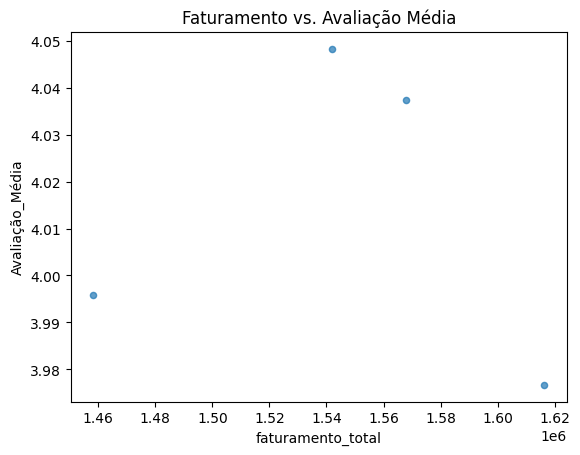

In [ ]:
import matplotlib.pyplot as plt # importando a biblioteca

# Gráfico de dispersão: Avaliação vs. Faturamento
resumo_completo.plot.scatter(x='faturamento_total', y='Avaliação_Média', alpha=0.7)
plt.title('Faturamento vs. Avaliação Média')
plt.show()



In [ ]:
#  Identificar lojas fora da curva
lojas_ruins = resumo_completo[resumo_completo['Avaliação_Média'] < 3]
lojas_boas = resumo_completo[resumo_completo['Avaliação_Média'] > 4.5]
print("Lojas com avaliação ruim:\n", lojas_ruins)
print("Lojas com avaliação excelente:\n", lojas_boas)


Lojas com avaliação ruim:
 Empty DataFrame
Columns: [faturamento_total, Qtd_Vendas, ticket_medio, ticket_Médio_Formatado, Participação, Avaliação_Média, Total_Vendas]
Index: []
Lojas com avaliação excelente:
 Empty DataFrame
Columns: [faturamento_total, Qtd_Vendas, ticket_medio, ticket_Médio_Formatado, Participação, Avaliação_Média, Total_Vendas]
Index: []


In [ ]:
# Tendências por categoria
media_categoria = dados.groupby('Categoria do Produto')['Avaliação da compra'].mean().sort_values()
print(media_categoria)


Categoria do Produto
utilidades domesticas    3.979452
esporte e lazer          3.988320
eletronicos              3.992664
instrumentos musicais    4.003984
livros                   4.004043
eletrodomesticos         4.014795
moveis                   4.033934
brinquedos               4.070543
Name: Avaliação da compra, dtype: float64


**Insights com base nas categorias**

Descobrir quais categorias mais influenciam a média da loja:

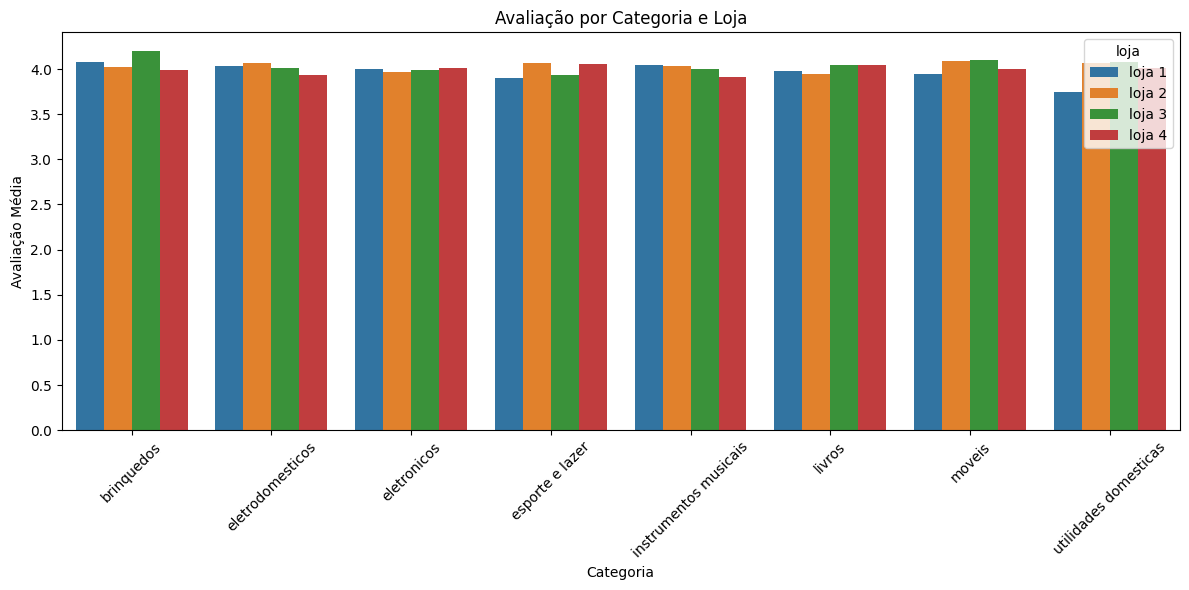

In [ ]:
import seaborn as sns

# Derreta a tabela para facilitar análise
avaliacao_categoria_melted = avaliacao_categoria.reset_index().melt(id_vars='loja', var_name='Categoria', value_name='Avaliação Média')

plt.figure(figsize=(12, 6))
sns.barplot(data=avaliacao_categoria_melted, x='Categoria', y='Avaliação Média', hue='loja')
plt.xticks(rotation=45)
plt.title('Avaliação por Categoria e Loja')
plt.tight_layout()
plt.show()


**Análise de outliers**

Identificar se alguma categoria específica está derrubando a avaliação de uma loja:

In [ ]:
# Ver quais categorias têm avaliação abaixo de 3.8 em alguma loja
baixa_avaliacao = avaliacao_categoria[avaliacao_categoria < 3.8].dropna(how='all')
print(baixa_avaliacao)


Categoria do Produto  brinquedos  eletrodomesticos  eletronicos  \
loja                                                              
loja 1                       NaN               NaN          NaN   

Categoria do Produto  esporte e lazer  instrumentos musicais  livros  moveis  \
loja                                                                           
loja 1                            NaN                    NaN     NaN     NaN   

Categoria do Produto  utilidades domesticas  
loja                                         
loja 1                             3.748538  


Ver tendência da avaliação ao longo do tempo
Veja como a avaliação média mudou ao longo dos meses:

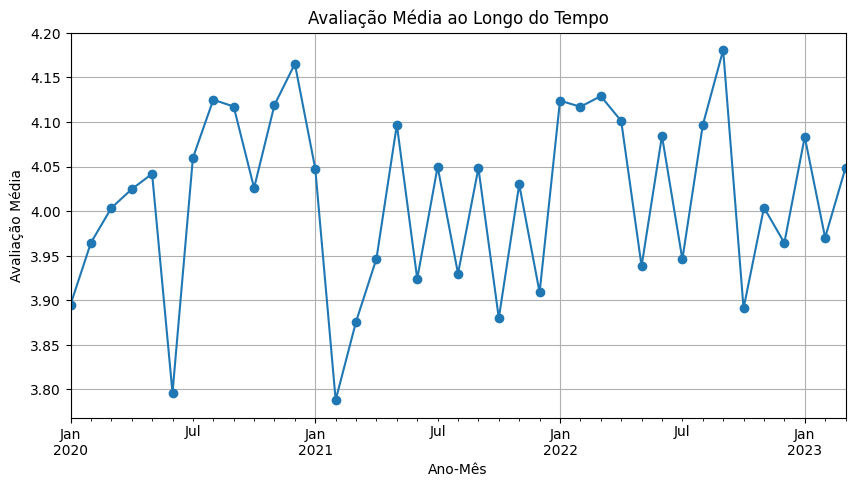

In [ ]:
# Converter a coluna de data para datetime se ainda não estiver
# dados['data_compra'] = pd.to_datetime(dados['data_compra']) # This line has error
dados['data_compra'] = pd.to_datetime(dados['Data da Compra']) # corrected column name

# Criar uma coluna de mês e ano
dados['ano_mes'] = dados['data_compra'].dt.to_period('M')

# Média de avaliação por mês
avaliacao_temporal = dados.groupby('ano_mes')['Avaliação da compra'].mean()

# Plotar
avaliacao_temporal.plot(marker='o', figsize=(10, 5))
plt.title('Avaliação Média ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Avaliação Média')
plt.grid(True)
plt.show()

2. Tendência de avaliação por loja ao longo do tempo

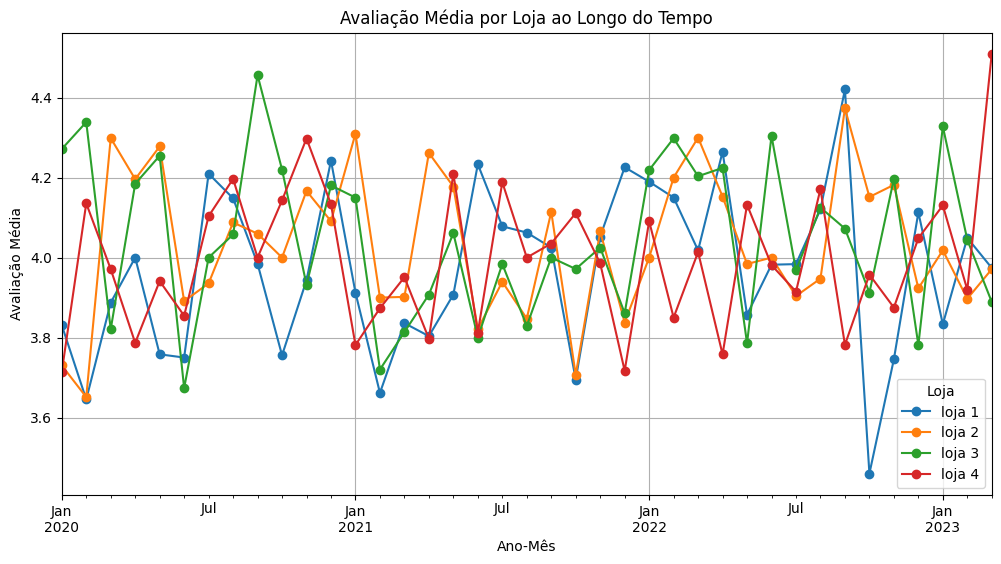

In [ ]:
avaliacao_loja_tempo = dados.groupby(['ano_mes', 'loja'])['Avaliação da compra'].mean().unstack()

avaliacao_loja_tempo.plot(figsize=(12,6), marker='o')
plt.title('Avaliação Média por Loja ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Avaliação Média')
plt.legend(title='Loja')
plt.grid(True)
plt.show()


3. Faturamento ao longo do tempo
Se quiser ver como o faturamento variou mês a mês:

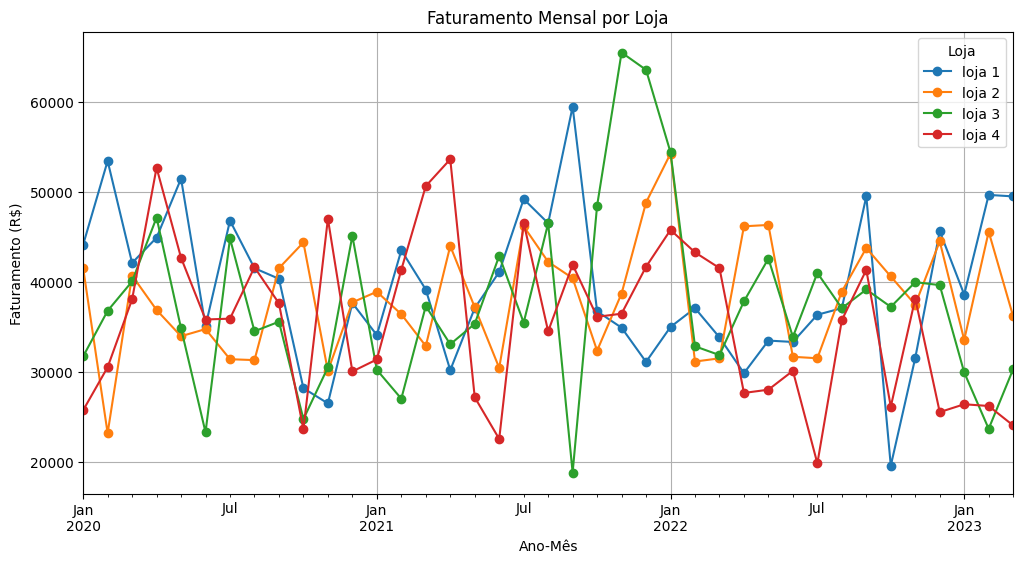

In [ ]:
faturamento_mensal = dados.groupby(['ano_mes', 'loja'])['Preço'].sum().unstack() # Changed 'Valor da Compra' to 'Preço'

faturamento_mensal.plot(figsize=(12,6), marker='o')
plt.title('Faturamento Mensal por Loja')
plt.xlabel('Ano-Mês')
plt.ylabel('Faturamento (R$)')
plt.legend(title='Loja')
plt.grid(True)
plt.show()

# 4. Produtos Mais e Menos Vendidos

🎯 Objetivo da análise:
Descobrir:

Quais produtos têm maior volume de vendas?

Quais produtos vendem pouco e talvez precisem de atenção (melhoria, promoção, substituição etc.)

In [ ]:
#Produtos Mais Vendidos (Top 5 por Loja)
top_produtos = dados.groupby(['loja', 'Produto'])['Faturamento_bruto'].sum().groupby('loja', group_keys=False).nlargest(5)
print(top_produtos.apply(lambda x: f'R$ {x:,.2f}'))

loja    Produto           
loja 1  TV Led UHD 4K         R$ 199,655.83
        Geladeira             R$ 157,500.10
        Celular Plus X42      R$ 137,521.57
        Smart TV               R$ 94,742.71
        Lavadora de roupas     R$ 92,352.82
loja 2  Celular Plus X42      R$ 159,007.34
        TV Led UHD 4K         R$ 145,170.13
        Geladeira             R$ 137,098.25
        Lavadora de roupas     R$ 93,773.45
        Smart TV               R$ 85,869.74
loja 3  Geladeira             R$ 140,243.61
        TV Led UHD 4K         R$ 135,754.04
        Celular Plus X42      R$ 130,945.47
        Smart TV              R$ 110,673.68
        Lava louças            R$ 90,381.25
loja 4  Celular Plus X42      R$ 135,786.49
        TV Led UHD 4K         R$ 126,787.23
        Smart TV              R$ 116,264.03
        Geladeira             R$ 105,681.05
        Tablet ABXY            R$ 79,700.02
Name: Faturamento_bruto, dtype: object


In [ ]:
#Produtos Menos Vendidos
pior_produtos = dados.groupby(['loja', 'Produto'])['Faturamento_bruto'].sum().groupby('loja', group_keys=False).nsmallest(5)
print(pior_produtos.apply(lambda x: f'R$ {x:,.2f}'))

In [ ]:
# Comparação de Mix de Produto
# % de participação dos top produtos no faturamento total da loja
top_participacao = top_produtos.groupby('loja').sum() / resumo_lojas['faturamento_total'] * 100
print(top_participacao.apply(lambda x: f'{x:.1f}%'))

loja
loja 1    42.2%
loja 2    39.6%
loja 3    39.4%
loja 4    38.7%
dtype: object


## Gráfico de Dispersão (Preço vs. Quantidade Vendida)

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dados,
    x='Preço',
    y='Faturamento_bruto',
    hue='loja',
    alpha=0.6
)
plt.title('Relação Preço x Faturamento por Produto')
plt.xlabel('Preço do Produto (R$)')
plt.ylabel('Faturamento Total (R$)')
plt.show()

## Análise de Categorias Problemáticas


In [ ]:
# Filtros produtos da Loja 4 com baixo faturamento e baixa avaliação:
produtos_ruins_loja4 = dados[
    (dados['loja'] == 'loja 4') &
    (dados['Faturamento_bruto'] < 10000) &  # Ajuste o valor conforme seus dados
    (dados['Avaliação da compra'] < 4.0)
]['Produto'].unique()

print(f"Produtos problemáticos na Loja 4: {produtos_ruins_loja4}")

Produtos problemáticos na Loja 4: ['Modelagem preditiva' 'Geladeira' 'Cômoda' 'Kit banquetas'
 'Jogo de copos' 'Bola de vôlei' 'Mesa de jantar' 'Secadora de roupas'
 'TV Led UHD 4K' 'Carrinho controle remoto' 'Dinossauro Rex' 'Bateria'
 'Celular ABXY' 'Blocos de montar' 'Jogo de panelas' 'Bola de basquete'
 'Celular Plus X42' 'Headset' 'Mochila' 'Lavadora de roupas' 'Tablet ABXY'
 'Faqueiro' 'Boneca bebê' 'Jogo de tabuleiro' 'Fogão' 'Lava louças'
 'Assistente virtual' 'Violão' 'Smartwatch' 'Micro-ondas' 'Poltrona'
 'Pandeiro' 'Smart TV' 'Xadrez de madeira' 'Dashboards com Power BI'
 'Bicicleta' 'Impressora' 'Iniciando em programação' 'Cama box'
 'Ciência de dados com python' 'Guitarra' 'Guarda roupas' 'Sofá retrátil'
 'Corda de pular' 'Cadeira de escritório' 'Panela de pressão'
 'Mesa de centro' 'Cubo mágico 8x8' 'Fone de ouvido' 'Copo térmico'
 'Cama king']


In [ ]:
volume_vendas = dados.groupby('Produto').size().sort_values(ascending=False)
print(volume_vendas.head(10))


Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Jogo de panelas             200
Modelagem preditiva         200
Secadora de roupas          200
Blocos de montar            199
Cama box                    199
dtype: int64


In [ ]:
mais_vendidos_qtd = dados.groupby(['loja', 'Produto']).size().groupby('loja', group_keys=False).nlargest(5)
print(mais_vendidos_qtd)


loja    Produto                 
loja 1  Guarda roupas               60
        Micro-ondas                 60
        TV Led UHD 4K               60
        Secadora de roupas          58
        Blocos de montar            56
loja 2  Iniciando em programação    65
        Micro-ondas                 62
        Bateria                     61
        Pandeiro                    58
        Violão                      58
loja 3  Kit banquetas               57
        Cama king                   56
        Mesa de jantar              56
        Cômoda                      55
        Jogo de panelas             55
loja 4  Cama box                    62
        Faqueiro                    59
        Cama king                   56
        Dashboards com Power BI     56
        Carrinho controle remoto    55
dtype: int64


In [ ]:
bons_ignorados = dados.groupby('Produto').agg({
    'Avaliação da compra': 'mean',
    'Faturamento_bruto': 'sum'
}).query('`Avaliação da compra` >= 4.5 and `Faturamento_bruto` < 5000')
print(bons_ignorados)


Empty DataFrame
Columns: [Avaliação da compra, Faturamento_bruto]
Index: []


In [ ]:
categoria_por_loja = dados.groupby(['loja', 'Categoria do Produto'])['Faturamento_bruto'].sum().unstack()
print(categoria_por_loja)


Categoria do Produto    brinquedos  eletrodomesticos    eletronicos  \
loja                                                                  
loja 1                25299.265959     510678.320571  603278.238660   
loja 2                22445.828832     489499.129045  576858.274761   
loja 3                27258.598348     462310.463552  576840.388656   
loja 4                28498.667182     397710.750496  575071.180723   

Categoria do Produto  esporte e lazer  instrumentos musicais        livros  \
loja                                                                         
loja 1                   55216.657567          128243.495861  12336.410244   
loja 2                   48828.896941          147397.090812  14195.836448   
loja 3                   50020.617735          108652.544679  13326.377563   
loja 4                   46825.771400          105408.349534  13148.807345   

Categoria do Produto         moveis  utilidades domesticas  
loja                                       

# 5. Frete Médio por Loja


In [ ]:
#Cálculo do Frete Médio
frete_medio = dados.groupby('loja')['Frete'].agg(['mean', 'count']).sort_values('mean', ascending=False) # Mostra o valor médio de frete por loja.
frete_medio.columns = ['Frete_Médio', 'Total_Vendas']
frete_medio['Frete_Médio_Formatado'] = frete_medio['Frete_Médio'].apply(lambda x: f'R${x:,.2f}')
print(frete_medio[['Frete_Médio_Formatado', 'Total_Vendas']])

       Frete_Médio_Formatado  Total_Vendas
loja                                      
loja 1               R$34.69          2359
loja 2               R$33.62          2359
loja 3               R$33.07          2359
loja 4               R$31.28          2358


In [ ]:
# % Faturamento
frete_percentual = (
    dados.groupby('loja')[['Frete', 'Faturamento_bruto']].sum()
    .apply(lambda x: x['Frete']/x['Faturamento_bruto']*100, axis =1))
print(frete_percentual.round(2).apply(lambda x: f'{x}%'))

loja
loja 1    5.06%
loja 2    5.06%
loja 3    5.06%
loja 4    5.06%
dtype: object


In [ ]:
#Relação entre Frete medio e Avaliação média
# interessante para ver se fretes mais altos impactam avaliações.
# Juntar dados de frete e avaliação
frete_avaliacao = frete_medio.merge(
    dados.groupby('loja')['Avaliação da compra'].mean(),
    left_index=True, right_index=True
)
print(frete_avaliacao[['Frete_Médio', 'Avaliação da compra']].round(2))

        Frete_Médio  Avaliação da compra
loja                                    
loja 1        34.69                 3.98
loja 2        33.62                 4.04
loja 3        33.07                 4.05
loja 4        31.28                 4.00


In [ ]:
#  Frete médio por categoria por loja
dados.groupby(['loja', 'Categoria do Produto'])['Frete'].mean().unstack()

Categoria do Produto,brinquedos,eletrodomesticos,eletronicos,esporte e lazer,instrumentos musicais,livros,moveis,utilidades domesticas
loja,,,,,,,,
loja 1,4.029278,82.580002,68.346001,9.961646,35.779153,3.598210,28.660661,5.016968
loja 2,3.781530,81.118030,68.920770,9.101116,33.080629,3.763891,28.466899,5.901943
loja 3,4.410788,83.904941,64.613013,9.258187,30.949687,3.576635,28.816984,6.120090
loja 4,4.387566,78.858663,64.532862,8.520294,31.010880,3.855815,28.430239,5.666338


<Axes: title={'center': 'Evolução do Frete Médio por Loja'}, xlabel='ano_mes'>

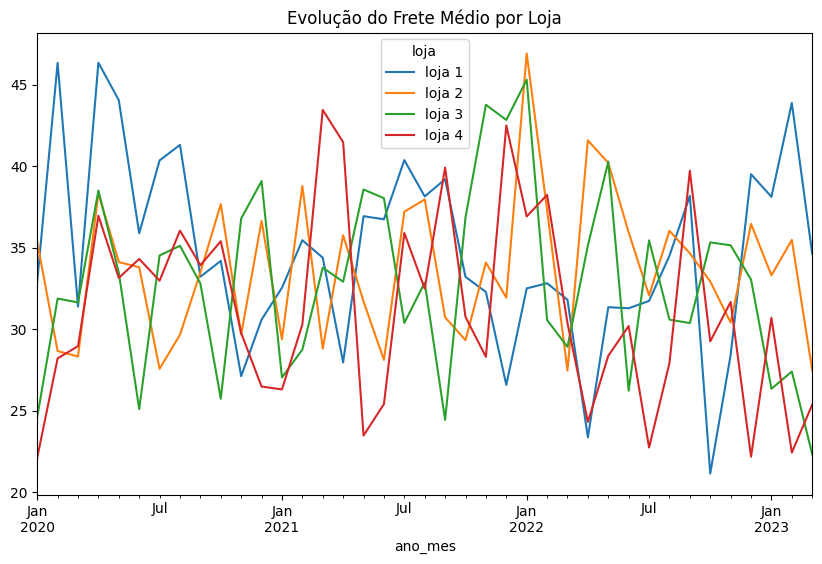

In [ ]:
# Análise de frete ao longo do tempo
# Como o frete varia mês a mês?
frete_tempo = dados.groupby(['ano_mes', 'loja'])['Frete'].mean().unstack()
frete_tempo.plot(figsize=(10,6), title='Evolução do Frete Médio por Loja')

In [ ]:
# Produtos com maior custo de entrega:
produtos_frete = dados.groupby('Produto')['Frete'].mean().sort_values(ascending=False).head(10)
print(produtos_frete)

Produto
TV Led UHD 4K         164.248782
Celular Plus X42      144.069410
Geladeira             142.794096
Smart TV              107.224182
Lavadora de roupas     97.642164
Lava louças            90.358817
Tablet ABXY            87.214043
Secadora de roupas     74.630056
Celular ABXY           71.439472
Guitarra               55.408944
Name: Frete, dtype: float64


In [ ]:
dados[['Preço', 'Frete']].corr()
print(dados)

                    Produto   Categoria do Produto    Preço      Frete  \
0        Assistente virtual            eletronicos   219.08   9.249790   
1            Mesa de jantar                 moveis   256.35  11.234305   
2         Jogo de tabuleiro             brinquedos   279.51  21.262681   
3               Micro-ondas       eletrodomesticos  1009.99  54.667344   
4     Cadeira de escritório                 moveis   446.99  26.964689   
...                     ...                    ...      ...        ...   
9430         Mesa de jantar                 moveis   303.60  16.852799   
9431  Cadeira de escritório                 moveis   456.02  24.812798   
9432           Copo térmico        esporte e lazer    48.99   3.139675   
9433        Jogo de panelas  utilidades domesticas   202.45  11.062979   
9434         Corda de pular        esporte e lazer    14.89   1.732696   

     Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0        2021-01-16     Pedro Gomes

# **VISUALIZAÇÃO GRAFICA**

## **Análise do faturamento**

** 1. Faturamento Total vs Ticket Médio por Loja**

Mostra o quanto cada loja fatura e qual o valor médio por venda — excelente para avaliar desempenho financeiro e eficiência.

In [ ]:
import matplotlib.pyplot as plt

# Configuração do estilo
try:
    plt.style.use('seaborn-v0_8')
except:
    plt.style.use('ggplot')

# Cria figura e eixos
fig, ax1 = plt.subplots(figsize=(10, 6))
azul, laranja = '#005b96', '#e67e22'

# Gráfico de barras (faturamento)
ax1.bar(resumo_lojas.index, resumo_lojas['faturamento_total']/1000,
        color=azul, width=0.6, label='Faturamento (R$ mil)')
ax1.set_ylabel('Faturamento (R$ mil)', color=azul, fontsize=12)
ax1.tick_params(axis='y', colors=azul)
ax1.set_xlabel('Lojas', fontsize=12)

# Gráfico de linha (ticket médio) com valores
ax2 = ax1.twinx()
line = ax2.plot(resumo_lojas.index, resumo_lojas['ticket_medio'],
               color=laranja, marker='D', linewidth=2, markersize=8,
               label='Ticket Médio (R$)')

# Adiciona os valores do ticket médio
for x, y in zip(resumo_lojas.index, resumo_lojas['ticket_medio']):
    ax2.annotate(f'R$ {y:.2f}',
                (x, y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center',
                color=laranja,
                fontsize=10,
                fontweight='bold')

ax2.set_ylabel('Ticket Médio (R$)', color=laranja, fontsize=12)
ax2.tick_params(axis='y', colors=laranja)

# Configurações finais
plt.title('Relação: Faturamento vs Ticket Médio\n', fontsize=14, pad=20)
ax1.legend(*[sum(x, []) for x in zip(ax1.get_legend_handles_labels(),
                                   ax2.get_legend_handles_labels())],
          loc='upper left')
ax1.grid(axis='y', linestyle=':', alpha=0.6)
fig.tight_layout()
plt.show()

** 2 - Participação no Faturamento Total (Gráfico de Pizza)**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Configuração inicial
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(8, 8), facecolor='#f5f5f5')

# Instead of 'Vendas', use 'Qtd_Vendas' which represents the total sales quantity
total_vendas = resumo_lojas['Qtd_Vendas'].sum()

# Gráfico de pizza (donut)
wedges, texts, autotexts = ax.pie(
    resumo_lojas['Participação'],
    labels=resumo_lojas.index,
    autopct=lambda p: f'{p:.1f}%',
    startangle=90,
    explode=[0.03 if i == resumo_lojas['Participação'].idxmax() else 0 for i in resumo_lojas.index],
    colors=sns.color_palette("husl", len(resumo_lojas)),
    wedgeprops={'linewidth': 1.5, 'edgecolor': 'white', 'width': 0.6},
    textprops={'fontsize': 11, 'fontweight': 'medium', 'color': '#333333'},
    pctdistance=0.85
)

# Círculo central branco (criando espaço para as informações)
centre_circle = Circle((0,0), 0.6, fc='white')
ax.add_patch(centre_circle)

# Adicionando informações no centro
ax.text(0, 0.2, 'Total de Vendas', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')
ax.text(0, -0.1, f'{total_vendas:,}', ha='center', va='center', fontsize=18, fontweight='bold', color='#005b96')  # Formato com separador de milhar

# Adicionando porcentagem média por loja (opcional)
avg_percent = 100 / len(resumo_lojas)
ax.text(0, -0.3, f'Média: {avg_percent:.1f}% por loja', ha='center', va='center', fontsize=11, color='#666666')

# Configurações finais
plt.setp(autotexts, size=11, weight='bold')
ax.set_title('Participação no Faturamento por Loja\n', fontsize=16, pad=25, fontweight='bold')
plt.legend(wedges, resumo_lojas.index, title="Lojas", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.75)
plt.show()

## **VENDAS POR CATEGORIAS**

### 1- Faturamento Total por Categoria
Tipo: Gráfico de barras verticais
Objetivo: Mostrar o total de vendas por categoria para identificar as mais lucrativas.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Dados
categorias = ['Eletrônicos', 'Eletrodomésticos', 'Móveis', 'Utilidades Domésticas', 'Livros']
faturamento = [2332048.08, 1860198.66, 1320500.22, 890300.15, 53007.43]

# Criando gráfico
plt.figure(figsize=(10, 6))
barras = plt.bar(categorias, faturamento, color='skyblue')

# Título e rótulos
plt.title('Faturamento Total por Categoria')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=30)

# Formatador de moeda
formatter = mticker.FuncFormatter(lambda x, _: f'R${x:,.0f}'.replace(',', '.'))
plt.gca().yaxis.set_major_formatter(formatter)

# Adicionando valores nas barras
for barra, valor in zip(barras, faturamento):
    plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height(),
             f'R${valor:,.0f}'.replace(',', '.'), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


###  Top 4 Categorias por Faturamento por Loja
Tipo: Gráfico de barras agrupadas
Objetivo: Comparar o desempenho das quatro categorias com maior faturamento em cada loja individualmente.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Função para configurar o estilo visual dos gráficos
def setup_plot_style():
    plt.style.use('seaborn-v0_8-whitegrid')  # Estilo com grid suave
    mpl.rcParams.update({
        'font.family': 'DejaVu Sans',        # Fonte padrão
        'axes.titleweight': 'bold',          # Peso do título dos eixos
        'axes.labelweight': 'light',         # Peso dos rótulos dos eixos
        'grid.color': '#e0e0e0'              # Cor da grade
    })

# Dicionário com paletas de cores para os dois gráficos (topo e base)
colors = {
    'top': ['#3a7ca5', '#2f6690', '#16425b', '#81c3d7'],        # Cores para gráfico do topo
    'bottom': ['#d9dcd6', '#a3bac3', '#7a93ac', '#5b7b7a']      # Cores para gráfico inferior
}

# Função para criar gráficos de barras formatados
def create_plot(ax, data, colors, title, is_top=True):
    # Plota os dados como barras
    data.plot(kind='bar', ax=ax, width=0.8, alpha=0.95, color=colors,
              edgecolor='white', linewidth=1.2)

    # Adiciona anotações de valor em cada barra
    for p in ax.patches:
        ax.annotate(f'R${p.get_height():,.0f}'.replace(',', '.'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 7),
                    textcoords='offset points', fontsize=9,
                    fontweight='medium',
                    color='white' if is_top else '#2b2d42',
                    bbox=dict(boxstyle='round,pad=0.2',
                              fc='#333333' if is_top else 'white', alpha=0.7))

    # Configurações do título e dos eixos
    ax.set_title(title, pad=10, fontsize=8, fontweight='bold', color='#2b2d42')
    ax.set_ylabel('Faturamento (R$)', labelpad=15, fontsize=12)
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('R${x:,.0f}'))  # Formato da moeda
    ax.set_facecolor('#ffffff')  # Cor de fundo do gráfico
    ax.set_ylim(0, ax.get_ylim()[1]*1.15)  # Expande o limite superior para espaço da anotação

    # Ajustes visuais das bordas do gráfico
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color('#e0e0e0')

# Configuração visual inicial
setup_plot_style()

# Criação da figura com dois gráficos (superior e inferior)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), facecolor='#f8f9fa')
plt.subplots_adjust(hspace=0.3)  # Espaçamento vertical entre os gráficos

# Geração do gráfico superior com as top 4 categorias por faturamento
create_plot(ax1, categoria_loja.loc[top_categorias].T, colors['top'],
            'TOP 4 CATEGORIAS POR FATURAMENTO')

# Geração do gráfico inferior com as 4 categorias de menor faturamento
create_plot(ax2, categoria_loja.loc[bottom_categorias].T, colors['bottom'],
            'CATEGORIAS COM MENOR FATURAMENTO', is_top=False)

# Rótulo do eixo X apenas no gráfico inferior
ax2.set_xlabel('Lojas', labelpad=15, fontsize=12)

# Legenda para o gráfico superior
legend = ax1.legend(title='Categorias', bbox_to_anchor=(1.02, 1),
                    loc='upper left', frameon=True)
legend.get_frame().set_facecolor('#ffffff')
legend.get_frame().set_edgecolor('#e0e0e0')
legend.get_title().set_fontweight('bold')

# Legenda para o gráfico inferior (mesma formatação)
legend2 = ax2.legend(title='Categorias', bbox_to_anchor=(1.02, 1),
                     loc='upper left', frameon=True)
legend2.get_frame().set_facecolor('#ffffff')
legend2.get_frame().set_edgecolor('#e0e0e0')

plt.tight_layout()
plt.show()

## **Média de Avaliação das Lojas**
* Gráfico de Linha

Gráfico 1:
 Avaliação Média Geral ao Longo do Tempo

Mostra como a média das avaliações de todos os pedidos evoluiu mês a mês.

Gráfico 2:
 Avaliação Média por Loja ao Longo do Tempo

Compara a qualidade percebida (avaliações) entre as lojas ao longo dos meses.

Gráfico 3:
 Faturamento Mensal por Loja

Mostra quanto cada loja faturou por mês, permitindo observar crescimento ou queda de receita.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar uma nova coluna com o período "Ano-Mês" para facilitar agrupamentos temporais
dados['ano_mes'] = dados['data_compra'].dt.to_period('M')   # Já está ok

# Calcular a avaliação média geral por mês
avaliacao_temporal = dados.groupby('ano_mes')['Avaliação da compra'].mean()

# Plotar avaliação média ao longo do tempo (geral)
plt.figure(figsize=(10, 5))
avaliacao_temporal.plot(marker='o', color='teal')
plt.title('Avaliação Média ao Longo do Tempo (Geral)')
plt.xlabel('Ano-Mês')
plt.ylabel('Avaliação Média')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular a avaliação média por loja ao longo do tempo
avaliacao_loja_tempo = dados.groupby(['ano_mes', 'loja'])['Avaliação da compra'].mean().unstack()

# Plotar avaliação média por loja ao longo do tempo
plt.figure(figsize=(12, 6))
avaliacao_loja_tempo.plot(marker='o')
plt.title('Avaliação Média por Loja ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Avaliação Média')
plt.grid(True)
plt.legend(title='Loja')
plt.tight_layout()
plt.show()

# Calcular o faturamento por loja ao longo do tempo
# Aqui usamos 'Faturamento_bruto' como valor monetário
faturamento_mensal = dados.groupby(['ano_mes', 'loja'])['Faturamento_bruto'].sum().unstack()

# Plotar o faturamento mensal por loja
plt.figure(figsize=(12, 6))
faturamento_mensal.plot(marker='o')
plt.title('Faturamento Mensal por Loja')
plt.xlabel('Ano-Mês')
plt.ylabel('Faturamento Total (R$)')
plt.grid(True)
plt.legend(title='Loja')
plt.tight_layout()
plt.show()

# Análise de correlação mensal entre avaliação média e faturamento total (geral)
# Agrupar por mês e calcular média da avaliação e soma do faturamento
dados_mensal = dados.groupby('ano_mes').agg({
    'Avaliação da compra': 'mean',
    'Faturamento_bruto': 'sum'
}).rename(columns={'Avaliação da compra': 'avaliacao_media', 'Faturamento_bruto': 'faturamento_total'})

# Calcular a correlação entre avaliação média e faturamento total mês a mês
correlacao_mensal = dados_mensal['avaliacao_media'].corr(dados_mensal['faturamento_total'])
print(f'Correlação mensal entre avaliação média e faturamento total: {correlacao_mensal:.2f}')



## **Produtos Mais e Menos Vendidos**

Faturamento por Categoria + Faturamento por Loja
Integração possível: Mostrar o faturamento por categoria dentro de cada loja, por exemplo em um gráfico de barras empilhadas ou facetado (um por loja).



In [ ]:
top_categorias = (
    dados.groupby('Categoria do Produto')['Faturamento_bruto']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filtrar apenas essas categorias nos dados
dados_top = dados[dados['Categoria do Produto'].isin(top_categorias)]



import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de faturamento por categoria (Top 10) por loja
g = sns.catplot(
    data=dados_top,
    x='Categoria do Produto',
    y='Faturamento_bruto',
    col='loja',
    hue='Categoria do Produto',
    kind='bar',
    col_wrap=2,
    height=3.5,
    aspect=1.5,
    palette='tab10',  # Paleta com cores distintas
    legend=True
)

# Ajustes visuais
g.set_titles("Loja: {col_name}")
g.set_axis_labels("Categoria do Produto", "Faturamento (R$)")
g.set_xticklabels(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()


In [ ]:
# Produtos com Alta Avaliação e Baixo Faturamento + Loja

bons_ignorados = dados.groupby(['loja', 'Produto']).agg({
    'Avaliação da compra': 'mean',
    'Faturamento_bruto': 'sum'
}).query('`Avaliação da compra` >= 4.5 and `Faturamento_bruto` < 5000').reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=bons_ignorados,
    x='Faturamento_bruto',
    y='Produto',
    hue='loja',
    dodge=True,
    palette='tab10'
)
plt.title('Produtos Bem Avaliados e Pouco Vendidos por Loja')
plt.xlabel('Faturamento (R$)')
plt.tight_layout()
plt.show()


In [ ]:
# . Top Produtos por Loja + Participação no Faturamento
top5 = dados.groupby(['loja', 'Produto'])['Faturamento_bruto'].sum().groupby('loja', group_keys=False).nlargest(5).reset_index()
faturamento_loja = dados.groupby('loja')['Faturamento_bruto'].sum()

top5['% Participação'] = top5.apply(
    lambda row: row['Faturamento_bruto'] / faturamento_loja[row['loja']] * 100,
    axis=1
)

plt.figure(figsize=(10, 6))
sns.barplot(data=top5, x='% Participação', y='Produto', hue='loja')
plt.title('Participação dos Top 5 Produtos no Faturamento das Lojas')
plt.tight_layout()
plt.show()


## **Frete Médio por Loja**

<Axes: title={'center': 'Evolução do Frete Médio por Loja'}, xlabel='ano_mes'>

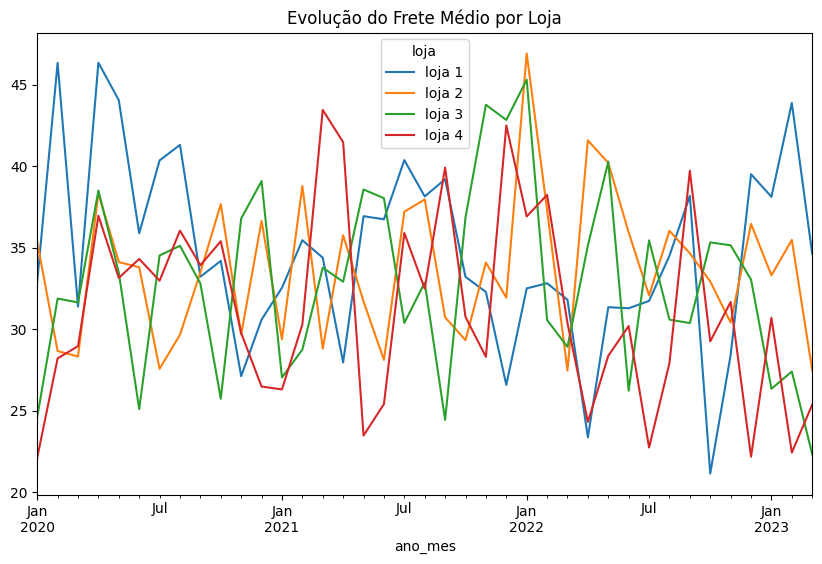

In [ ]:
# Análise de frete ao longo do tempo
frete_tempo = dados.groupby(['ano_mes', 'loja'])['Frete'].mean().unstack()
frete_tempo.plot(figsize=(10,6), title='Evolução do Frete Médio por Loja')


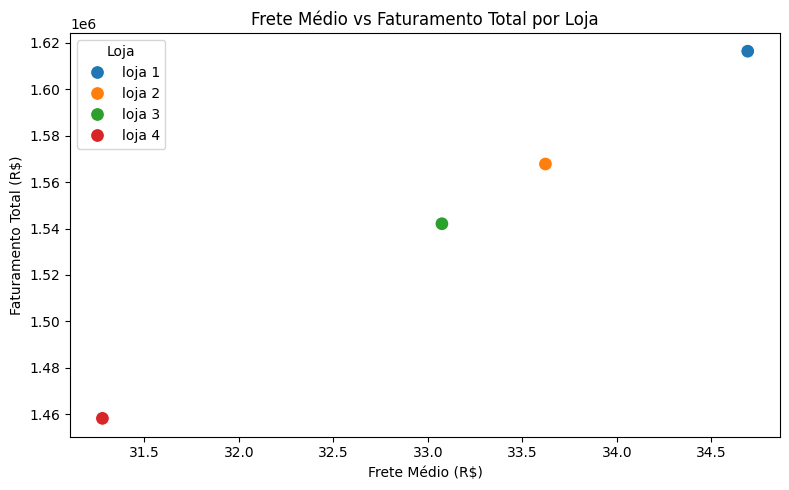

In [ ]:
 #Frete Médio por Loja + Faturamento Total por Loja
#Objetivo: Comparar o frete médio com o faturamento total de cada loja para identificar possíveis correlações.

import seaborn as sns
import matplotlib.pyplot as plt

# 'frete_medio' was likely intended instead of 'Frete_medio'
Frete_faturamento = frete_medio.merge(resumo_lojas[['faturamento_total']], left_index=True, right_index=True)
# 'faturamento_total' was not defined, extracted it from 'resumo_lojas'

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Frete_Médio',
    y='faturamento_total', # Corrected y-axis column name
    data=Frete_faturamento.reset_index(),
    hue='loja',
    s=100
)
plt.title('Frete Médio vs Faturamento Total por Loja')
plt.xlabel('Frete Médio (R$)')
plt.ylabel('Faturamento Total (R$)')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()

<ipython-input-82-3cd8d5a9f975>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frete_medio_loja, x='loja', y='Frete', palette='Blues_d', ax=axes[0])


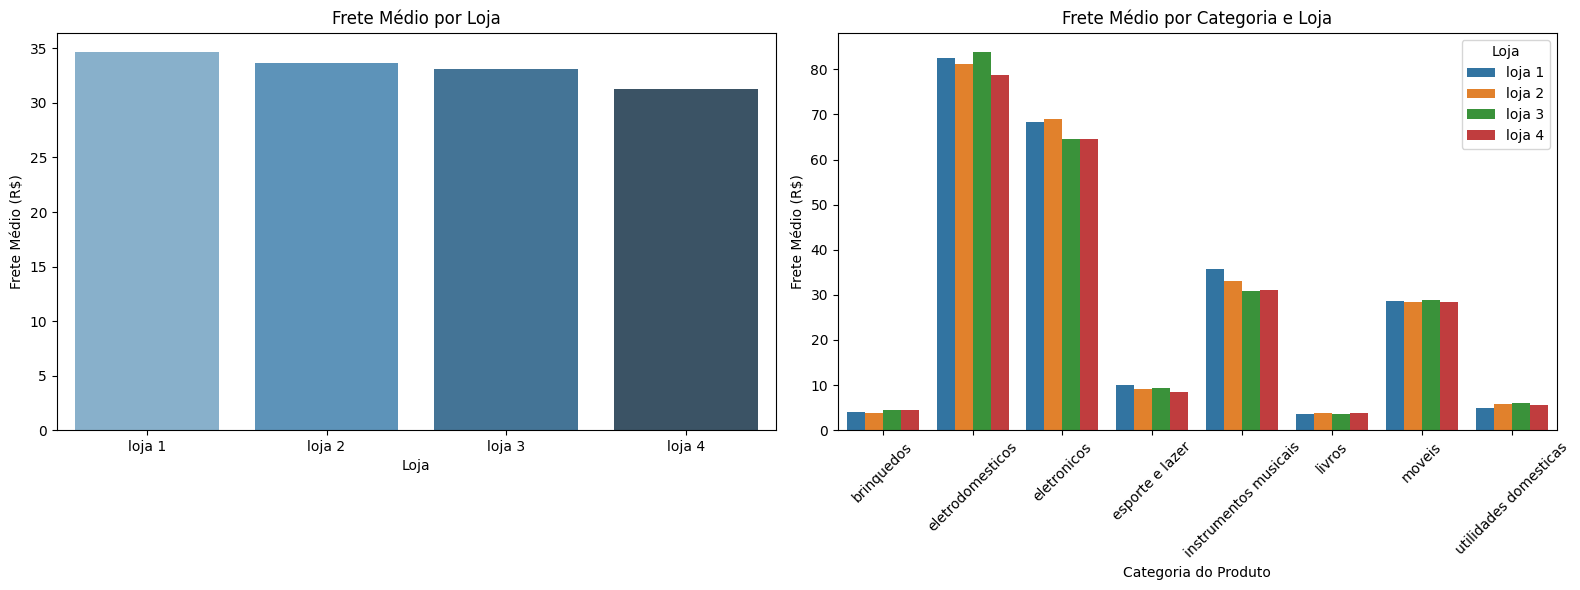

In [ ]:
# Frete Médio por Categoria e Loja
# Objetivo: Comparar o frete médio entre diferentes categorias de produtos em cada loja
# Calcular os dados necessários
frete_medio_loja = dados.groupby('loja')['Frete'].mean().reset_index()
frete_categoria_loja = dados.groupby(['loja', 'Categoria do Produto'])['Frete'].mean().reset_index()

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de frete médio por loja
sns.barplot(data=frete_medio_loja, x='loja', y='Frete', palette='Blues_d', ax=axes[0])
axes[0].set_title('Frete Médio por Loja')
axes[0].set_xlabel('Loja')
axes[0].set_ylabel('Frete Médio (R$)')

# Gráfico de frete médio por categoria e loja
sns.barplot(data=frete_categoria_loja, x='Categoria do Produto', y='Frete', hue='loja', ax=axes[1])
axes[1].set_title('Frete Médio por Categoria e Loja')
axes[1].set_xlabel('Categoria do Produto')
axes[1].set_ylabel('Frete Médio (R$)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Loja')

plt.tight_layout()
plt.show()


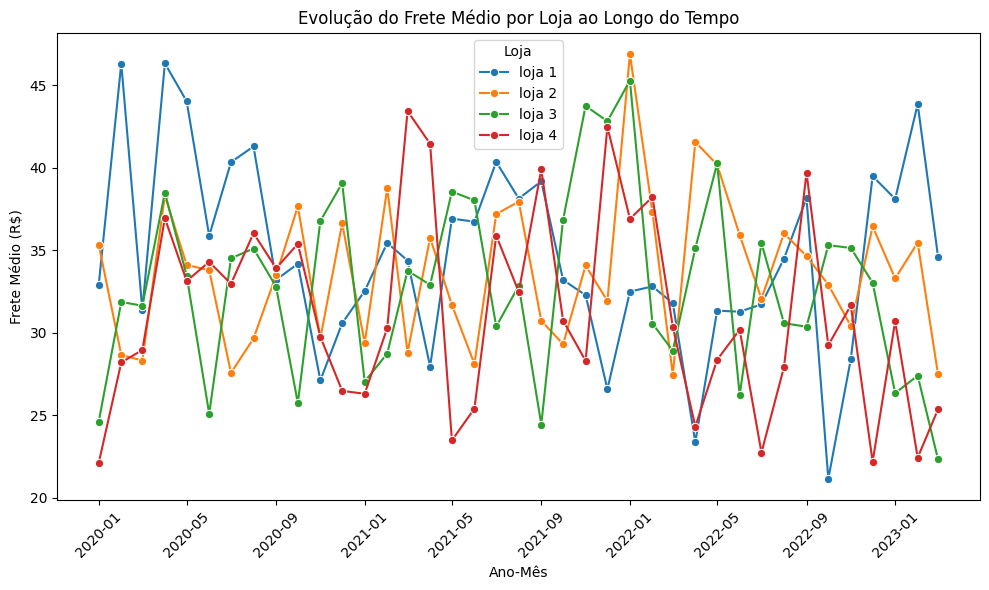

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Supondo que 'dados' seja seu DataFrame original
# Certifique-se de que 'ano_mes' está no formato datetime
dados['ano_mes'] = dados['ano_mes'].dt.to_timestamp()
# Calcular o frete médio por loja e por mês
frete_tempo = dados.groupby(['ano_mes', 'loja'])['Frete'].mean().reset_index()

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=frete_tempo,
    x='ano_mes',
    y='Frete',
    hue='loja',
    marker='o'
)

# Formatar o eixo X para mostrar apenas ano e mês
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.title('Evolução do Frete Médio por Loja ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Frete Médio (R$)')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()
